In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

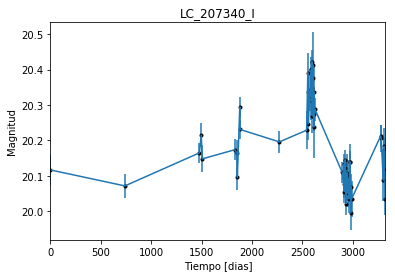

In [2]:
data = np.genfromtxt('LC_207340_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_207340_I')
plt.savefig("LC_207340_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

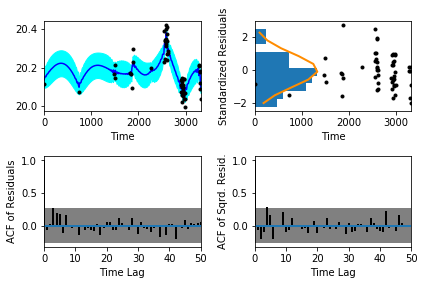

In [5]:
sample.assess_fit()

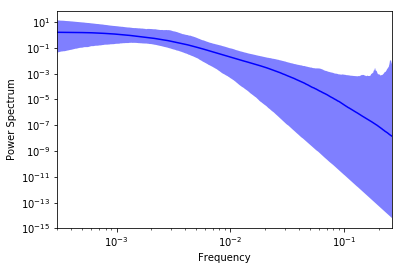

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

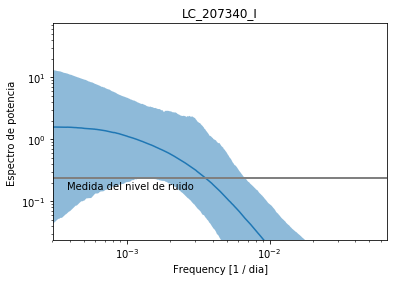

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_207340_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_207340_I')

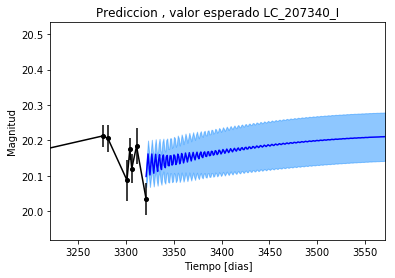

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_207340_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_207340_I')

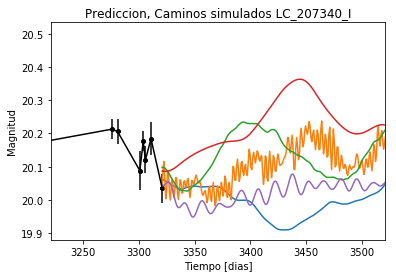

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_207340_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


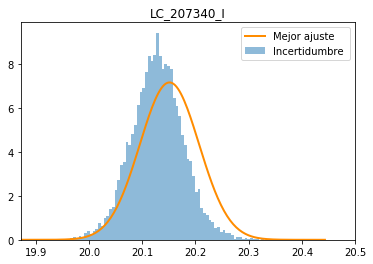

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_207340_I')
plt.savefig("Mejor_ajuste_LC_207340_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_207340_I')

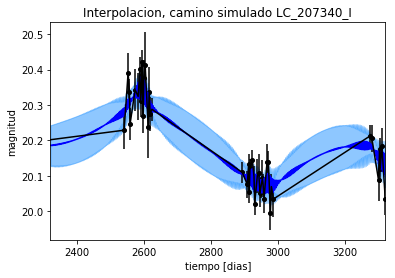

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_207340_I')

Text(0.5,1,'Interpolacion, camino simulado LC_207340_I')

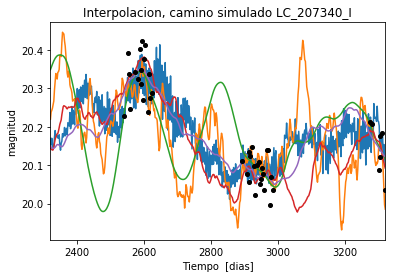

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_207340_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 849.468330904
Median: 0.00856137374731
Standard deviation: 0.0987472904525
68% credibility interval: [ 0.00116447  0.11151337]
95% credibility interval: [ 0.00039959  0.37834523]
99% credibility interval: [  3.16124068e-04   4.90099806e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 564.165981795
Median: 0.00438596685213
Standard deviation: 0.0609889411885
68% credibility interval: [ 0.00097334  0.0357757 ]
95% credibility interval: [ 0.00038006  0.22785492]
99% credibility interval: [  3.12962493e-04   3.95828791e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 666.247225598
Median: 0.0303301757613
Standard deviatio

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1323.83059205
Median: 96.1410301619
Standard deviation: 1.89606026514
68% credibility interval: [ 94.29915     97.50138261]
95% credibility interval: [ 91.66287801  99.84529   ]
99% credibility interval: [  89.63013298  101.16330018]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 757.055865437
Median: 0.612913264823
Standard deviation: 1.30016140366
68% credibility interval: [ 0.0741694   2.51349538]
95% credibility interval: [ 0.0228229   4.58194627]
99% credibility interval: [ 0.01355153  5.64468738]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 433.234197076
Median: 0.803198972342
Standard deviation: 2.87730600272
68% credibility interval: [ 0.04247799  3.9491037 ]
95% credibility interval: [  3.02621057e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1461.27470881
Median: 7.27940458564e-36
Standard deviation: 2.80087464919e+40
68% credibility interval: [  1.00830773e-75   2.74230897e-06]
95% credibility interval: [  3.79895128e-106   2.50828474e+036]
99% credibility interval: [  6.83138344e-121   2.45019832e+037]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2385.00981133
Median: 20.166596045
Standard deviation: 0.0393682350182
68% credibility interval: [ 20.13072286  20.19866514]
95% credibility interval: [ 20.08113958  20.23516245]
99% credibility interval: [ 20.01886386  20.27279746]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 493.18775156
Median: 0.0622359264394
Standard deviation: 0.139392594904
68% credibility interval: [ 0.          0.26886036]
95% credibility interval: [ 0.          0.46474315]
99% credibility interval: [ 0.          0.51110384]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 493.18775156
Median: 0.0622359264394
Standard deviation: 0.139392594904
68% credibility interval: [ 0.          0.26886036]
95% credibility interval: [ 0.          0.46474315]
99% credibility interval: [ 0.          0.51110384]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 398.250016293
Median: 0.0
Standard deviation: 0.00114338826636
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1323.83059205
Median: 96.1410301619
Standard deviation: 1.89606026514
68% credibility interval: [ 94.29915     97.50138261]
95% credibility interval: [ 91.66287801  99.84529   ]
99% credibility interval: [  89.63013298  101.16330018]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2073.07941292
Median: 0.00857796470262
Standard deviation: 0.00826024502822
68% credibility interval: [ 0.0053736   0.01540995]
95% credibility interval: [ 0.00348148  0.03015705]
99% credibility interval: [ 0.00269915  0.05109571]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 558.940589938
Median: 1.18865065267
Standard deviation: 0.213223336025
68% credibility interval: [ 0.99403119  1.40980778]
95% credibility interval: [ 0.80242365  1.65563654]
99% credibility interval: [ 0.72760656  1.8517172 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 409.946512874
Median: 0.000318205273746
Standard deviation: 0.0298738574455
68% credibility interval: [  1.44203395e-06   1.26502382e-02]
95% credibility interval: [  7.21231311e-39   8.65054098e-02]
99% credibility interval: [  5.97778900e-40   1.89627981e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 849.468330904
Median: (-0.0537926977384-0.210749605781j)
Standard deviation: 1.07332774637
68% credibility interval: [-0.70065918+0.j        -0.00731656-0.0225129j]
95% credibility interval: [-2.37721318-2.74891165j -0.00251072-2.73353402j]
99% credibility interval: [ -3.07938790e+00-3.17159991j  -1.98626610e-03-0.17649127j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 564.165981795
Median: (-0.0275578424831+1.54065156101j)
Standard deviation: 0.955993333616
68% credibility interval: [-0.22478533+1.22980097j -0.00611565+1.7502108j ]
95% credibility interval: [-1.43165471+1.27355067j -0.00238801+1.57745711j]
99% credibility interval: [ -2.48706564e+00 +3.10104021e+00j  -1.96640134e-03 +7.59945320e-05j]
Posterior summ